In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the data by sns 
data = sns.load_dataset("datasets/mpg")
data.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Cleaning the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
data.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
# I will drop the missing values
data = data.dropna()

In [6]:
# Converting the mpg into liters_per_100KM
data['liters_per_100KM'] = round(235 / data['mpg'], 2)
# Drop the mpg column
data.drop('mpg', axis = 1, inplace = True)
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,liters_per_100KM
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,13.06
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.67
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,13.06
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,14.69
4,8,302.0,140.0,3449,10.5,70,usa,ford torino,13.82


In [7]:
# Removing the "name" column
data.drop('name', axis = 1, inplace = True)


In [8]:
# Save the data to a new csv file
data.to_csv("datasets/cleaned_data.csv", index = False)

In [9]:
# Using one hot encoding to convert "region" column into numerical values
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
region_encoded = encoder.fit_transform(data[['origin']]).astype(int)
region_encoded = pd.DataFrame(region_encoded, columns = encoder.get_feature_names_out(['origin']))
data = pd.concat([data, region_encoded], axis = 1)
# Drop the "origin" column
data.drop('origin', axis = 1, inplace = True)   
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,liters_per_100KM,origin_europe,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,13.06,0,0,1
1,8,350.0,165.0,3693,11.5,70,15.67,0,0,1
2,8,318.0,150.0,3436,11.0,70,13.06,0,0,1
3,8,304.0,150.0,3433,12.0,70,14.69,0,0,1
4,8,302.0,140.0,3449,10.5,70,13.82,0,0,1


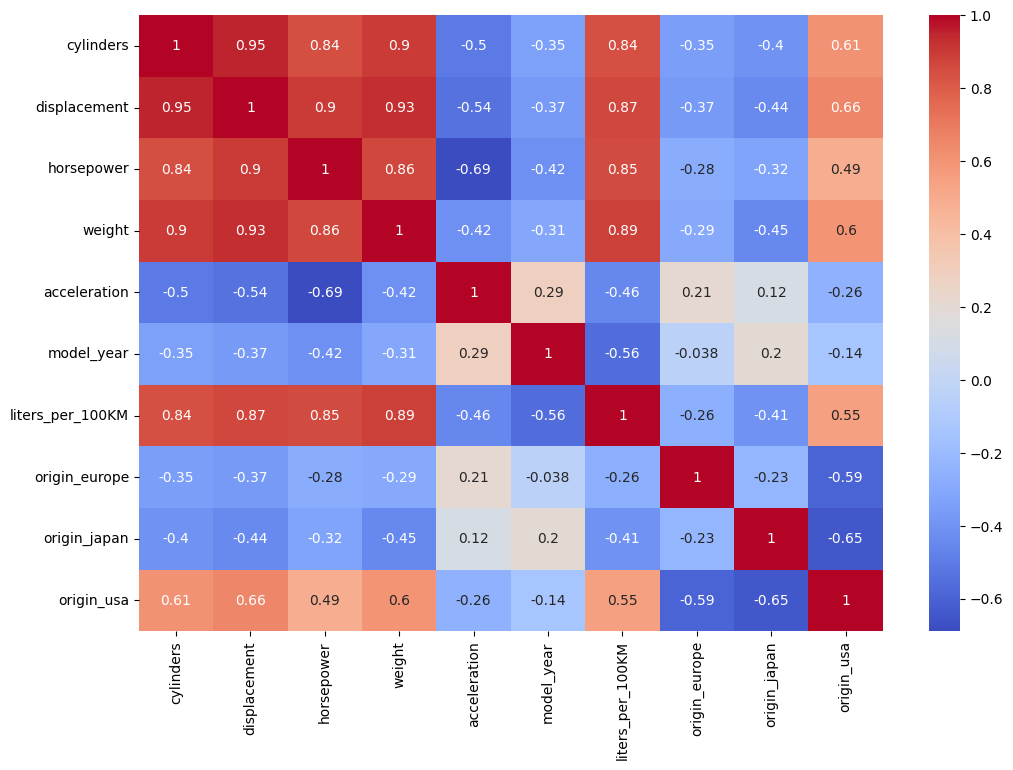

In [10]:
# Since all columns are numerical, I need to check for correlation
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
1. Cylinders, Displacement, Horsepower, and Weight are high correlation with each other. These correlations make sense because larger engines (more cylinders and higher displacement)  have higher horsepower.

2. Acceleration has negative correlation  with  Cylinders and Weight which means heavier cars with more cylinders have slower acceleration.
3. Model Year has  weak correlations with m Cylinders and Weight.
4. Acceleration also has low correlations with Origin.

### Finding the two weak correlated columns
Model Year and Acceleration, because both columns have weak correlation with Cylinders and Horsepower

In [11]:
# Removing the "Model Year"  and Acceleration
data = data.drop(['model_year', 'acceleration'], axis = 1)
data.head()

,cylinders,displacement,horsepower,weight,liters_per_100KM,origin_europe,origin_japan,origin_usa
0,8,307.0,130.0,3504,13.06,0,0,1
1,8,350.0,165.0,3693,15.67,0,0,1
2,8,318.0,150.0,3436,13.06,0,0,1
3,8,304.0,150.0,3433,14.69,0,0,1
4,8,302.0,140.0,3449,13.82,0,0,1


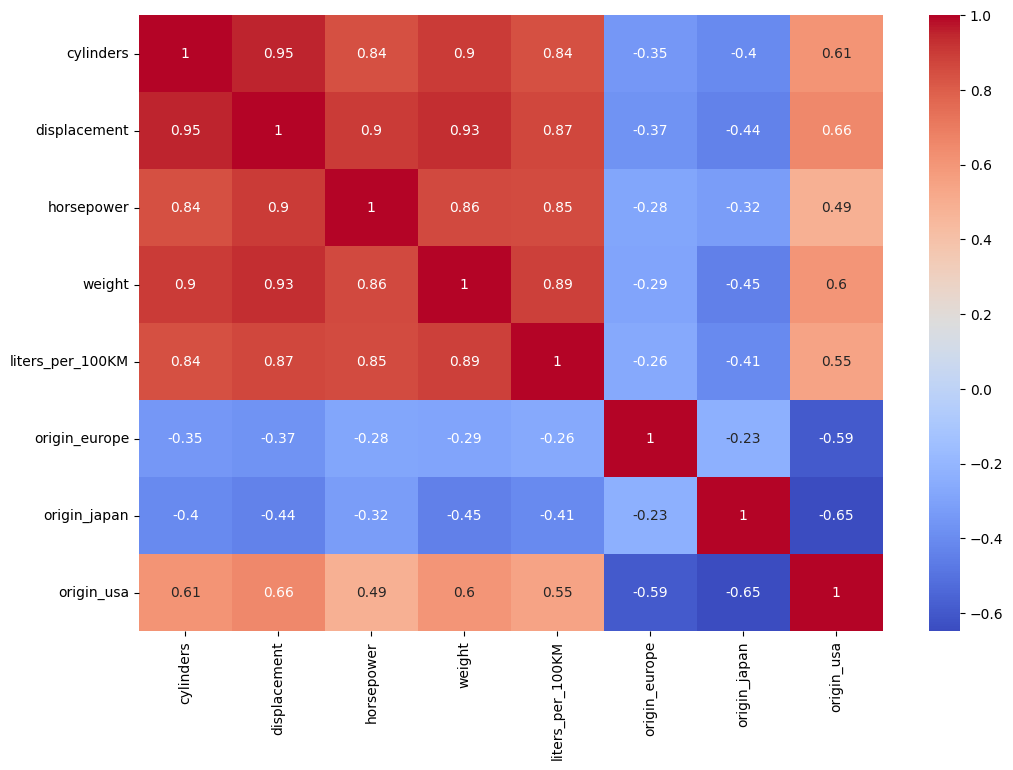

In [12]:
# After removing the columns, I will check for correlation again
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
After I removed the Model Year and Acceleration, now the focus is on the  engine size, weight, and  fuel consumption. <br>
Cars from USA are heavier, bigger, stronger and have more fuel consumption than cars from Europe and Japan 

#### Which column is the best selection to indicate the car’s efficiency, and why? (cylinders, horsepower or displacement/engine size)
I pick the Cylinder because it has strong correlation with  fuel consumption, engine size, power, and weight.


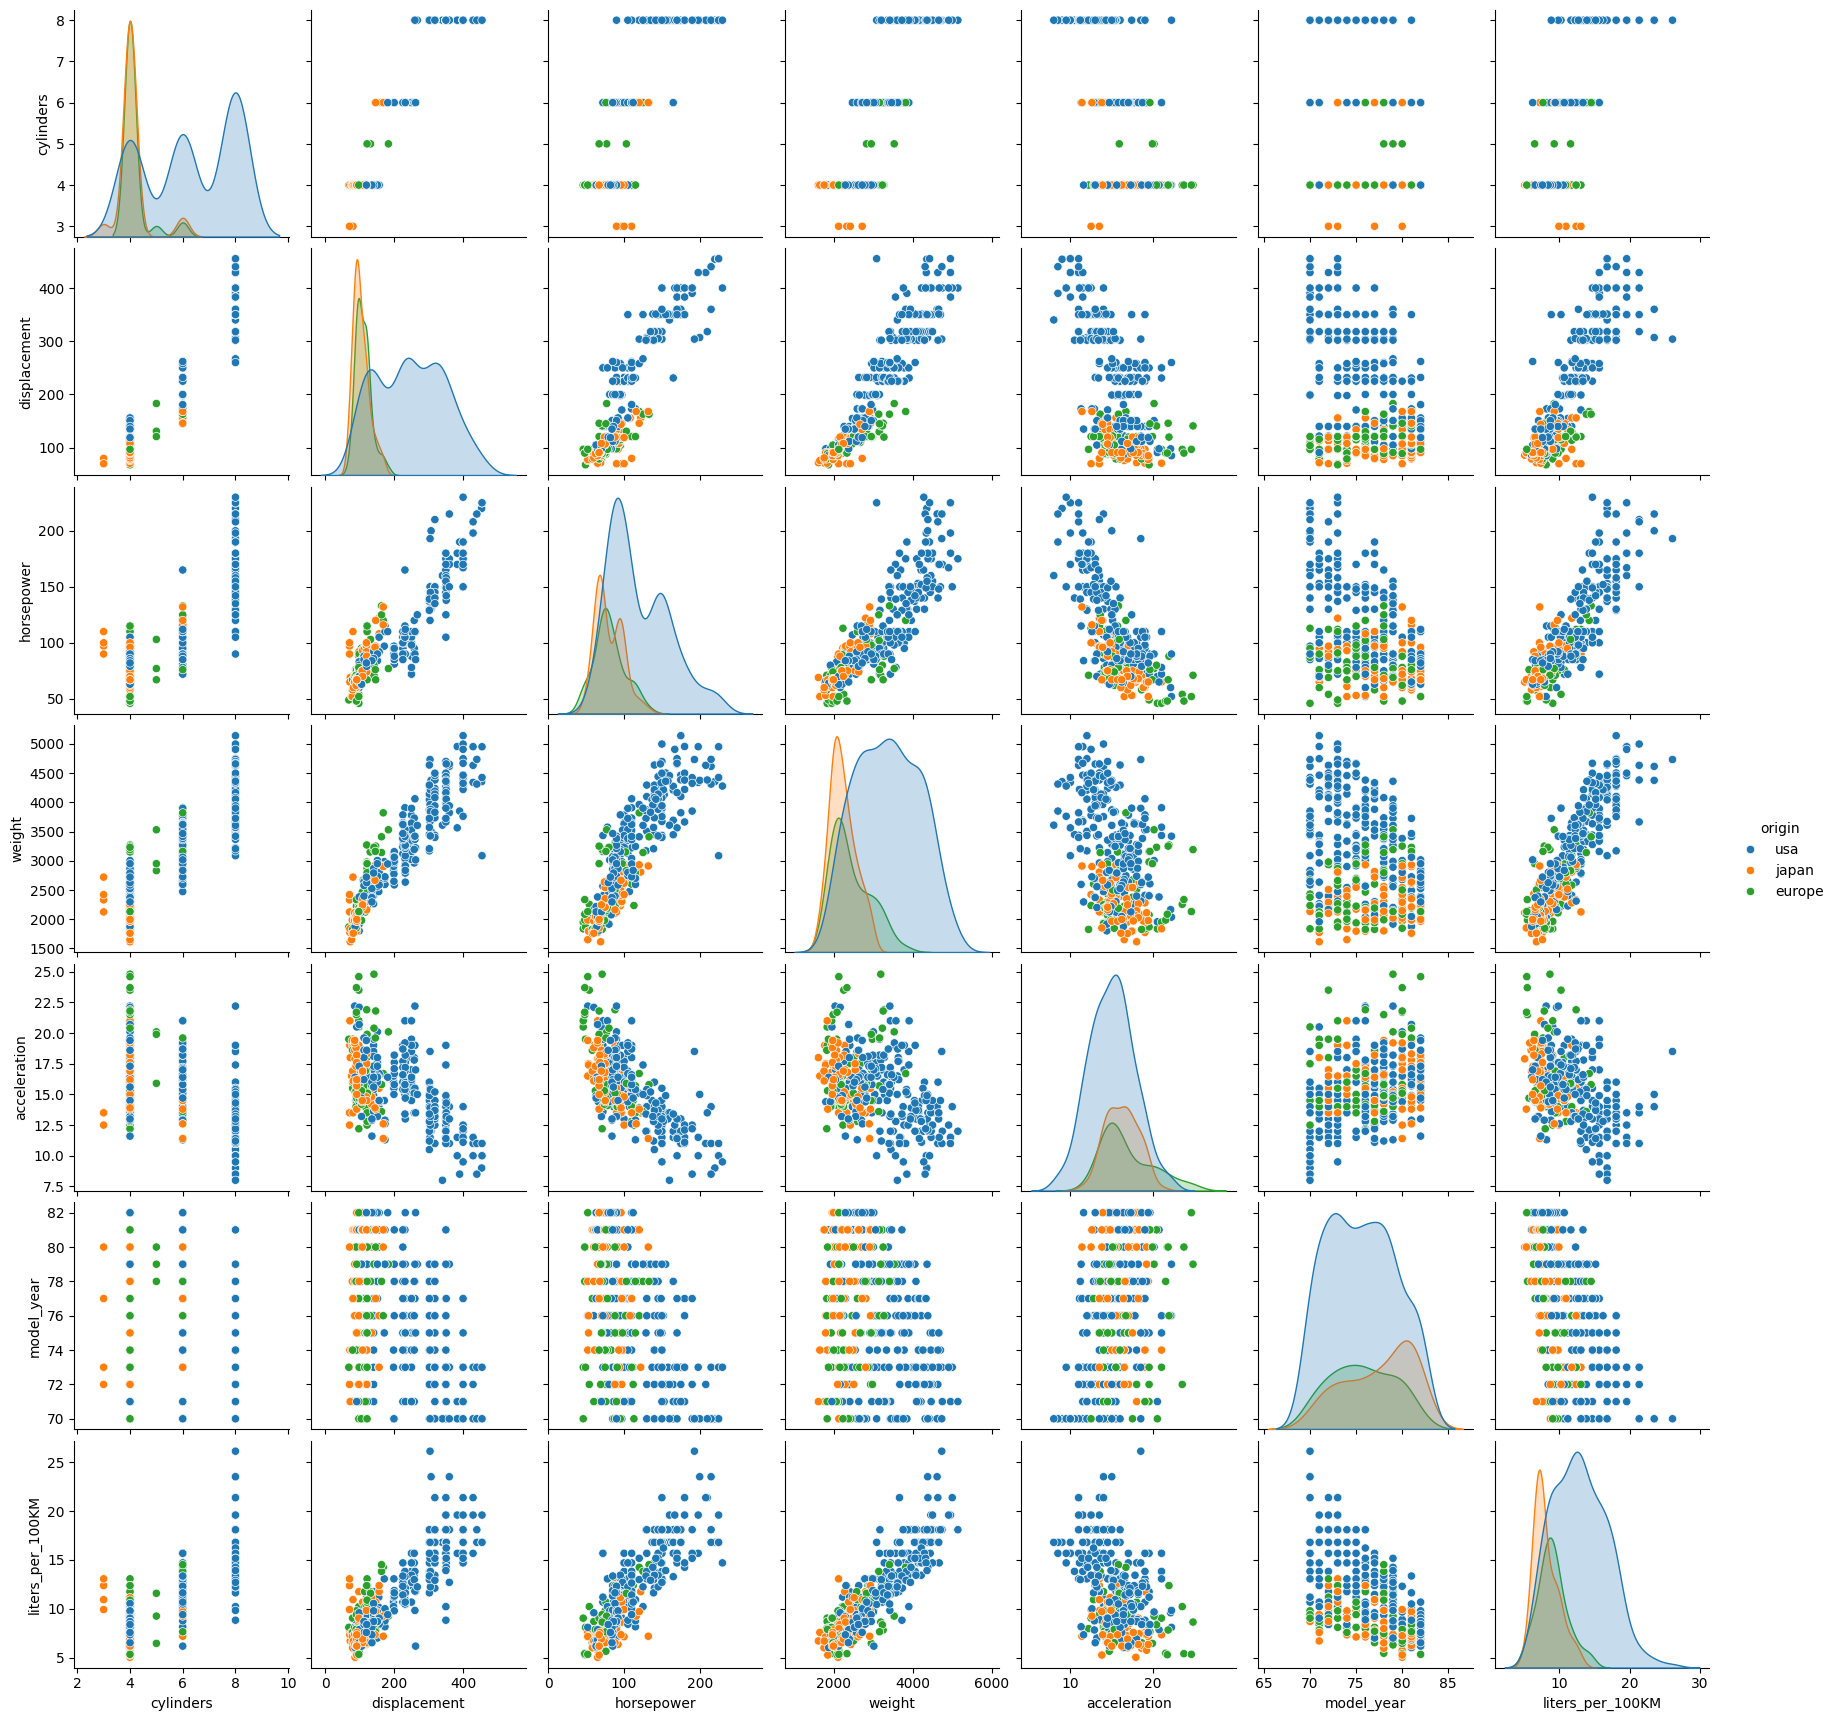

In [13]:
# pair plot with hue for the "origin"
df = pd.read_csv("datasets/cleaned_data.csv")
sns.pairplot(df, hue='origin')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Cars from the USA have the highest horsepower, weight, and engine size and highest liters per 100KM consumption compared to cars from Europe and Japan.<br>
Cars from Japan and Europe have  better fuel efficiency than cars from the USA, these are smaller, lighter and have smaller engines.



In [14]:
# It is so clear that cars from the USA highest consumption of fuel
# let's check the average consumption of fuel for each region
df.groupby('origin')['liters_per_100KM'].mean().sort_values(ascending=False)

origin
usa       12.891510
europe     8.980147
japan      8.055063
Name: liters_per_100KM, dtype: float64

In [15]:
# Let's check the average weight of cars for each region
# I think the weight is in KG so I convert it into Tons
round(df.groupby('origin')['weight'].mean().sort_values(ascending=False)/1000, 2)

origin
usa       3.37
europe    2.43
japan     2.22
Name: weight, dtype: float64

In [16]:
# Categorize number of cylinders based on the Fuel consumption  
numbers_cly = data.groupby('cylinders')['liters_per_100KM'].mean().sort_values(ascending=False)
numbers_cly.round(2).reset_index()

,cylinders,liters_per_100KM
0,8,16.22
1,6,12.11
2,3,11.57
3,5,9.10
4,4,8.32
